# Lab 3: Instacart Market Basket

## Fuente de datos

El dataset proviene de una compentencia de Kaggle (https://www.kaggle.com/c/instacart-market-basket-analysis/data). Los datos contienen información de órdenes realizadas por los usuarios en el tiempo.

## Descripción de archivos (Extraída de Kaggle)

The dataset for this competition is a relational set of files describing customers' orders over time. The dataset is anonymized and contains a sample of over 3 million grocery orders from more than 200,000 Instacart users. For each user, we provide between 4 and 100 of their orders, with the sequence of products purchased in each order. We also provide the week and hour of day the order was placed, and a relative measure of time between orders. For more information, see the blog post accompanying its public release.

Each entity (customer, product, order, aisle, etc.) has an associated unique id. Most of the files and variable names should be self-explanatory.
aisles.csv

 aisle_id,aisle  
 1,prepared soups salads  
 2,specialty cheeses  
 3,energy granola bars  
 ...

departments.csv

 department_id,department  
 1,frozen  
 2,other  
 3,bakery  
 ...

order_products__train.csv

These files specify which products were purchased in each order. 'reordered' indicates that the customer has a previous order that contains the product. Note that some orders will have no reordered items.

 order_id,product_id,add_to_cart_order,reordered  
 1,49302,1,1  
 1,11109,2,1  
 1,10246,3,0  
 ... 

orders.csv

'order_dow' is the day of week.

 order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order  
 2539329,1,prior,1,2,08,  
 2398795,1,prior,2,3,07,15.0  
 473747,1,prior,3,3,12,21.0  
 ...

products.csv

 product_id,product_name,aisle_id,department_id
 
 1,Chocolate Sandwich Cookies,61,19  
 2,All-Seasons Salt,104,13  
 3,Robust Golden Unsweetened Oolong Tea,94,7  
 ...


In [2]:
#### Cargar librerías a usar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [5]:
#### Carga de datos
dfOrderTrain = pd.read_csv('order_products__train.csv')
dfOrder = pd.read_csv('orders.csv')
dfDepartments = pd.read_csv('departments.csv')
dfProducts = pd.read_csv('products.csv')
dfAisles = pd.read_csv('aisles.csv')

In [17]:
dfOrderTrain.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [9]:
dfOrder.sort_values('user_id').head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
10,1187899,1,train,11,4,8,14.0
9,2550362,1,prior,10,4,8,30.0
7,3108588,1,prior,8,1,14,14.0
6,550135,1,prior,7,1,9,20.0


In [5]:
dfDepartments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [6]:
dfProducts.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [7]:
dfAisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


           order_id
order_dow          
0            600905
1            587478
2            467260
3            436972
4            426339
5            453368
6            448761


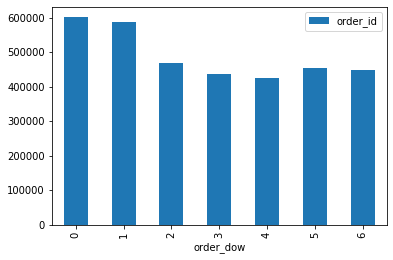

In [7]:
#### Muestra la cantidad de órdenes realizadas por día de semana (order_dow) y gráficalo usando dataframe.plot(kind='bar')

#ordenesDiasSemana = dfOrder.pivot_table("order_id", "order_dow", aggfunc ="count")
ordenesDiasSemana = dfOrder.groupby('order_dow')[['order_id']].count()
print(ordenesDiasSemana)
ordenesDiasSemana.plot(kind='bar')


                   order_id
order_hour_of_day          
0                     22758
1                     12398
2                      7539
3                      5474
4                      5527
5                      9569
6                     30529
7                     91868
8                    178201
9                    257812
10                   288418
11                   284728
12                   272841
13                   277999
14                   283042
15                   283639
16                   272553
17                   228795
18                   182912
19                   140569
20                   104292
21                    78109
22                    61468
23                    40043


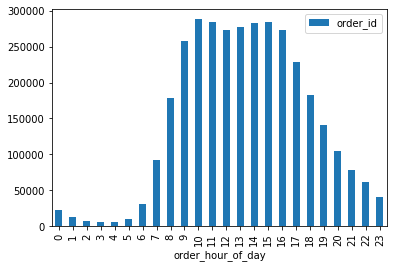

In [19]:
#### Muestra la cantidad de órdenes realizadas por hora del día (order_hour_of_day) y gráficalo usando dataframe.plot(kind='bar')
ordenesHoraDia = dfOrder.pivot_table("order_id", "order_hour_of_day", aggfunc ="count")
print(ordenesHoraDia)
ordenesHoraDia.plot(kind='bar')


In [10]:
#### ¿Cuántos productos compra en promedio un usuario en una orden?
PromedioProductos = dfOrder.groupby('user_id').count()
PromedioProductos.order_id.mean()

,order_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
user_id,,,,,,
1,11,11,11,11,11,10
2,15,15,15,15,15,14
3,13,13,13,13,13,12
4,6,6,6,6,6,5
5,5,5,5,5,5,4
6,4,4,4,4,4,3
7,21,21,21,21,21,20
8,4,4,4,4,4,3
9,4,4,4,4,4,3


In [61]:
#### ¿Cuál es el departamento que más está presente en las órdenes?
join1 = dfOrderTrain.merge(dfProducts, left_on="product_id", right_on="product_id")
join2 = join1.merge(dfDepartments, left_on="department_id", right_on="department_id")
join3 = join2.groupby("department").count()
join3["Cant_Productos"] = join3["order_id"]
join3 = join3.sort_values("order_id", ascending = False)
join3["Cant_Productos"].head(1)


department
produce    409087
Name: Cant_Productos, dtype: int64

In [ ]:
cols_wanted=['last_name_x', 'first_name_x', 'candidate_id', 'id', 'last_name_y']
dfcwci.merge(dfcand, left_on="candidate_id", right_on="id")[cols_wanted]

In [12]:
### ¿Cuáles son los mejores productos en venta?
join1=dfOrderTrain.merge(dfProducts, left_on="product_id",right_on="product_id")
join1 = join1.groupby("product_name").count()
join1['Mas_vendidos'] = join1['product_id']
join1 = join1.sort_values('product_id', ascending=False)
join1.Mas_vendidos.head(1)


product_name
Banana    18726
Name: Mas_vendidos, dtype: int64

In [20]:
#### ¿Cuáles son los productos más frecuentes reordenados?
join1= pd.merge(dfOrderTrain, dfProducts, left_on='product_id', right_on='product_id')
join1
#join1=dfOrderTrain.merge(dfProducts, left_on="product_id",right_on="product_id")
#join1 = join1.groupby("product_name")[['reordered']].sum().sort_values('reordered',ascending = False)
#join1.head(5)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,1,49302,1,1,Bulgarian Yogurt,120,16
1,816049,49302,7,1,Bulgarian Yogurt,120,16
2,1242203,49302,1,1,Bulgarian Yogurt,120,16
3,1383349,49302,11,1,Bulgarian Yogurt,120,16
4,1787378,49302,8,0,Bulgarian Yogurt,120,16
5,2445303,49302,2,1,Bulgarian Yogurt,120,16
6,2853065,49302,12,1,Bulgarian Yogurt,120,16
7,3231517,49302,6,1,Bulgarian Yogurt,120,16
8,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16
9,68474,11109,8,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16


In [ ]:
product_name
Banana                    16557
Bag of Organic Bananas    13362
Organic Strawberries       8603
Organic Baby Spinach       8055
Organic Avocado            6226
Name: reordered, dtype: int64